# Stationarity and Autocorrelation

## What we will accomplish

In this notebook we will:
- Motivate the study of stationary time series
- Define the concepts of:
    - Strict stationarity
    - Weak stationarity
- Learn about autocorrelation,
- Plot autocorrelation at different lags

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from seaborn import set_style
set_style("whitegrid")

## Motivation

So far, our regression analysis has taken the form:

$$
Y = f(X) + \epsilon
$$

This could be rewritten as 

$$
Y - f(X) = \epsilon
$$

and finally, using the function $F(a,b) = a - f(b)$ it could be rewritten as 

$$
F(X, Y) = \epsilon
$$

where $\epsilon$ is generally assumed to have a fixed distribution independent of $X$ or $Y$.  We then develop various ways to estimate $\hat{F}$ (and perhaps something about $\epsilon$) from data $(x_i, y_i)$.

We could view this as attempting to find something about the relationship between $X$ and $Y$ which is *invariant*.  If we had $\epsilon  = 0$ then our relationship would be **exact**. The next best thing is to make assumptions such as, in increasing order of assumption strength, that:

* $\epsilon$ has mean $0$ but might otherwise depend on $X$.
* $\epsilon$ has mean $0$ and constant variance, but we don't know the distribution (which may or may not depend on $X$).
* $\epsilon$ is normally distributed with mean $0$, constant variance, and is independent of $X$.

We need to believe that *something* about the relationship between $X$ and $Y$ doesn't change in order to get started with regression modeling.

We have to adjust this story a bit for time series.  Let's stick with a time series $y_t$ without any covariates. Then our best hope is that 

$$
F(t, y_{t}, y_{t-1}, y_{t-2}, \dots) = \epsilon_t
$$

is somehow "invariant".  For instance we might be happy if we could determine that

$$
y_t = \sin(t) + 0.5 y_{t-1} + \epsilon_t, \hphantom{dsada} \epsilon_t \sim \operatorname{NID}(0, \sigma^2)
$$

In this case the joint distribution between $y_t$ and $y_{t-1}$ is invariant under translation.

We might also be happy if we could determine that

$$
y_t = 3 + 5t + \epsilon_t,  \hphantom{dsada} \textrm{ where } \epsilon_t - 0.5 \epsilon_{t-1} \sim \operatorname{U}([-1,1])
$$

This would also result in a joint distribution between $y_t$ and $y_{t-1}$ which is invariant under translation, but with consecutive error terms correlated in an interesting way.

Our goal in time series modeling is thus to find a relation

$$
F(t, y_{t}, y_{t-1}, y_{t-2}, \dots) = \epsilon_t
$$

which makes the joint distribution of the $\epsilon_t$'s "invariant" under translation.  This notion is formalized by the concept of **stationarity**.

Our work is complicated by the fact that we only get to see one version of history:  we cannot "reroll the tapes".  So we generally only have access to one realization of this data generating process:  only one observation of $y_0$, $y_1$, $y_2$, ... etc.  This is one thing that makes time series modeling such a difficult task!

## Stationarity

We say that a time series $\left\lbrace y_t  \right\rbrace$ is <i>strictly stationary</i> if the joint probability distribution of $y_{t_1}, y_{t_2}, \dots y_{t_n}$ is equal to that of $y_{t_1 + \tau}, y_{t_2 + \tau}, \dots y_{t_n + \tau}$. for any $t_1, \dots, t_n, \tau, n$. This implies that the joint distribution only depends on the intervals between $t_1, \dots, t_n$ and in particular if $n=1$:

$$
E(y_t) =  \mu, \ \ \ \text{Var}(y_t) = \sigma^2
$$

are not functions of $t$. Further if $n=2$ the joint distribution of $y_{t_1}$ and $y_{t_2}$ only depends on $(t_2 - t_1)$, which is called the <i>lag</i> between $t_1$ and $t_2$.

Strict stationarity is quite restrictive and we more often define a weaker sense of <i>stationarity</i>.

We will say that a time series is **covariance stationary** if:

$$
E(y_t) = \mu, \ \text{ and } \ \text{Cov}\left( y_t, y_{t+\tau} \right) = \gamma(\tau).
$$

This is also known as "weak sense stationary", "wide sense stationary" or just "stationary".

### Examples

Some examples of a stationary time series are:
- White noise, 
- A moving average process, i.e. 

$$
y_{t} = \beta_0 \epsilon_{t} + \beta_1 \epsilon_{t-1} + \beta_2 \epsilon_{t-2} + \dots + \beta_q \epsilon_{t-q}
$$

with the $\epsilon \sim \operatorname{NID}(0, \sigma^2)$.

- An autoregressive process, i.e.

$$
y_{t} = \beta_0 y_{t-1} + \beta_1 y_{t-2} + \beta_2 y_{t-3} + \dots + \beta_q y_{t-q-1} + \epsilon_t
$$

with the $\epsilon \sim \operatorname{NID}(0, \sigma^2)$.

Note:  These last two examples are only stationary for certain values of $\beta$.

## Autocorrelation

The <i>autocorrelation</i> of a time series is essentially the correlation of that time series with its future observations placed at different lags. In particular, the autocorrelation of a time series at lag $k$ is given by:

$$
\begin{align*}
r_k &= 
\operatorname{Corr}(y_{t+k},y_t)\\
&=\frac{\operatorname{Cov}(y_{t+k},y_{t})}{\operatorname{StDev}(y_{t+k})\operatorname{StDev}(y_{t})} \\
\end{align*}
$$

If the time series is stationary, then $\operatorname{StDev}(y_{t+k}) = \operatorname{StDev}(y_{t})$, so their product is just the variance $\operatorname{Var}(y_t)$.  In this case we can use

$$
\hat{r}_k = \frac{\displaystyle\sum_{t=1}^{n-k} \left(y_t - \overline{y}\right) \left(y_{t+k} - \overline{y} \right)}{\displaystyle\sum_{t=1}^n \left(y_t - \overline{y}\right)^2}
$$

as the sample statistic where $n$ is the last observation of the time series.

### Correlogram

We commonly plot this as a way to understand the autocorrelation structure. This can be done with `statsmodels` `plot_acf` function, <a href="https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html">https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html</a>.

#### Example: White noise

In [14]:
import statsmodels.api as sm

In [15]:
## make some data
## white noise
np.random.seed(440)
series = np.random.random(100) - .5

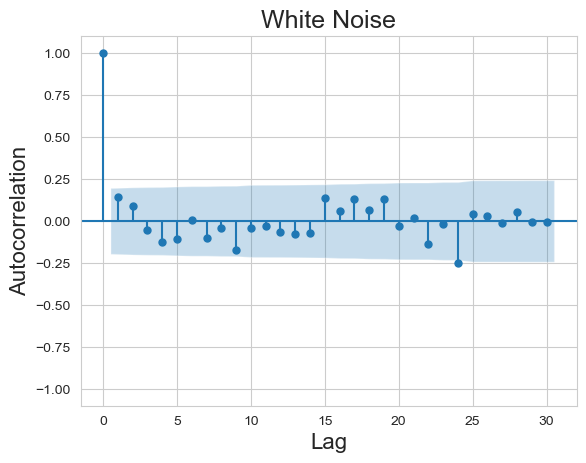

In [16]:
## first put in the time series
## then set how many lags you want to consider
## the default is lags=30
sm.graphics.tsa.plot_acf(series,
                            lags = 30)

plt.title('White Noise', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

The autocorrelation of every time series will be $1$ at lag $0$. For stationary series, like white noise, we expect to seem some low autocorrelation for small lags. Autocorrelation should then tend to randomly bubble around getting closer and closer to $0$ as the lag increases.

#### Example: Data with a trend

If your data exhibits a trend it is <b>not</b> stationary. Here is an example of what the associated correlogram may look like for data with a trend.

In [17]:
goog = pd.read_csv("../../data/google_stock.csv", parse_dates=['date'])

In [25]:
goog

,date,closing_price
0,2004-08-19,49.982655
1,2004-08-20,53.952770
2,2004-08-23,54.495735
3,2004-08-24,52.239197
4,2004-08-25,52.802086
...,...,...
4427,2022-03-21,2729.570068
4428,2022-03-22,2805.550049
4429,2022-03-23,2770.070068
4430,2022-03-24,2826.239990


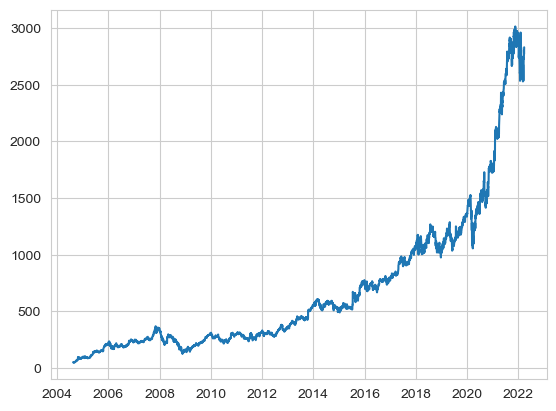

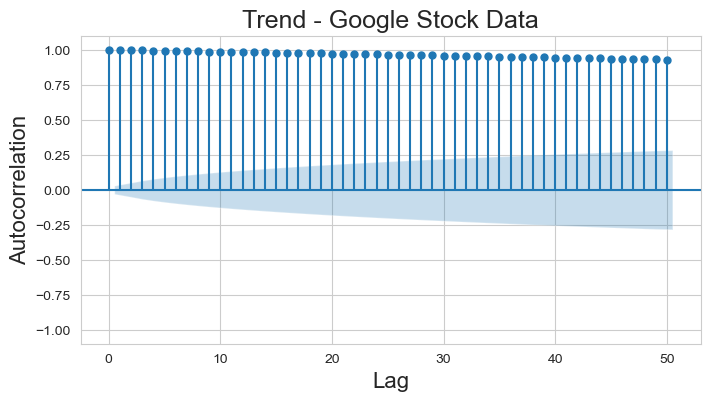

In [27]:
plt.plot(goog.date, goog.closing_price)

fig, ax = plt.subplots(1, 1, figsize=(8,4))

sm.graphics.tsa.plot_acf(goog.closing_price.values,
                            lags = 50,
                            ax = ax)

plt.title('Trend - Google Stock Data', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

If you see a correlogram that has high (in magnitude) autocorrelation values over a long range of lags this is indicative of a time series that is not stationary.

#### Example: Data with seasonality

If your data exhibits seasonality it is <b>not</b> stationary. Here is an example that demonstrates what a seasonal correlogram may look like.

In [19]:
flu = pd.read_csv("../../data/us_flu_1928_1948.csv", parse_dates=['date'])

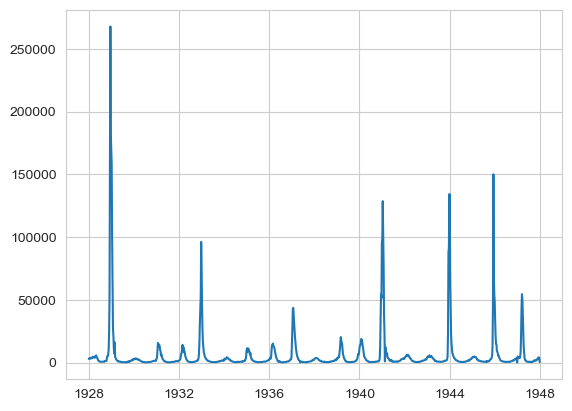

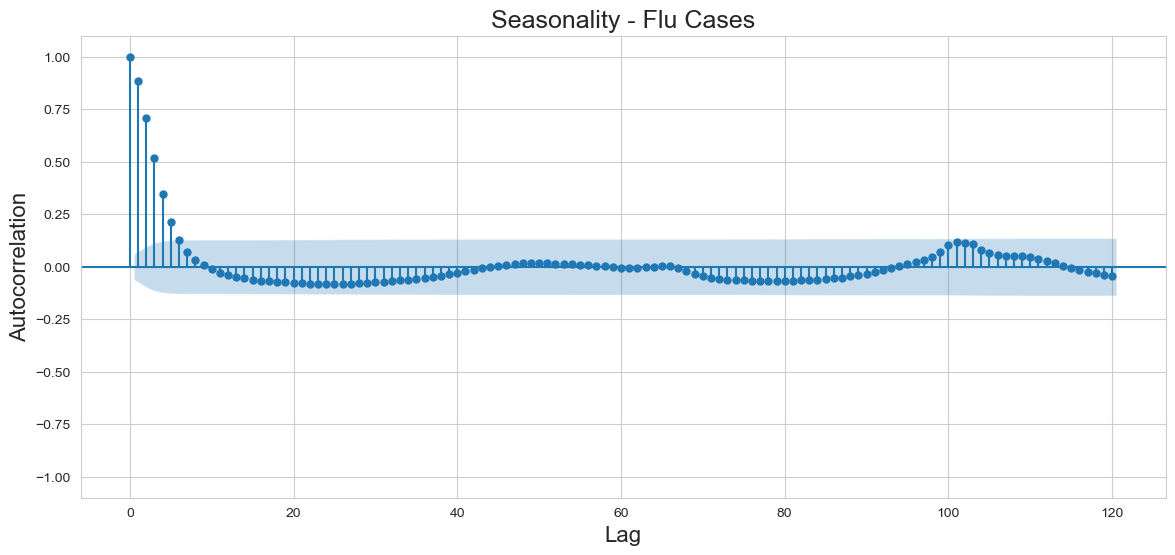

In [29]:
plt.plot(flu.date, flu.cases)


fig, ax = plt.subplots(1, 1, figsize=(14,6))

sm.graphics.tsa.plot_acf(flu.cases,
                            lags=120,
                            ax=ax)

plt.title('Seasonality - Flu Cases', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

Time series with seasonality often produce sinusoidal autocorrelation plots. Similar to our above point, seeing sinusoidal autocorrelation may hint at seasonality but is not always proof that a time series exhibits seasonality. However, it does imply that the time series is probably not stationary.

## Strategies for finding the relation $F$

There are further assumptions one can make, which can be justified only through domain expertise and/or investigation of your particular time series.

One common assumption is that the time series is **trend stationary**:

$$
y_t = f(t) + \epsilon_t
$$

with $f$ belonging to some hypothesis class and $\epsilon_t$ being a stationary series of some specified form (for example MA or AR structure).

Another common assumption is that the time series is **difference stationary**:

$$
y_{t} - y_{t - 1} = \epsilon_t
$$

So two common strategies are to:

* Regress $y_t$ on $t$ to obtain $\hat{f}(t)$ and use then model the residuals $y - \hat{f}(t)$ as some stationary process.
* Directly model $y_{t} - y_{t-1}$ as some stationary process.  Often we need to "difference more than once" which we will address later in this lecture.

### Statistical tests

There are formal statistical tests that you can perform to examine if a time series whether a time series is stationary, but we will not cover them. Interested parties may wish to start here:
- <a href="https://en.wikipedia.org/wiki/Unit_root_test">https://en.wikipedia.org/wiki/Unit_root_test</a> and
- <a href="https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test">https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test</a>.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.  Modified by Steven Gubkin 2024.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)